In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv(r"C:\Users\matab\OneDrive\Desktop\Praca\vscode-jupyter\project1\data\otomoto_offers_eng_23-04-2023.csv", sep=";", on_bad_lines='skip', engine='python')
df.head(5)

,id,offer_creation_date,offer_title,price,currency,seller_type,seller_registration_year,location,offer_from,category,...,the_second_glass_sunroof_sliding_and_tilting_el,hardtop,battery_capacity,autonomy,right_hand_drive_english,front_piping,rear_seats_with_massage_functions,ceramic_composite_brakes,off-road_tires,charging_time
0,6106252111,2023-04-20 14:52:00,Volvo V70,23200,PLN,Dealer,2015,"Łużycka 14B - 72-600 Świnoujście, Zachodniopom...",Firmy,Osobowe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6103725874,2023-04-21 06:44:00,Honda Accord 2.0 Comfort,16800,PLN,Private person,2020,"Inowrocław, inowrocławski, Kujawsko-pomorskie",Osoby prywatnej,Osobowe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6109470482,2023-04-15 14:38:00,Mercedes-Benz Klasa X 350 d 4-Matic Power,249900,PLN,Dealer,2007,"OLSZYNY-192 - 32-831 Olszyny, gm. Wojnicz, tar...",Firmy,Osobowe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6108732545,2023-04-13 16:11:00,Toyota Avensis 1.8 VVT-i Sol,16499,PLN,Dealer,2011,"Grodzka 113 - 87-800 Włocławek, Kujawsko-pomor...",Firmy,Osobowe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6108048263,2023-04-17 15:15:00,Ford C-MAX 2.0 TDCi Champions Edition,29900,PLN,Dealer,2013,"Orchów 172A - 98-100 Łask, łaski, Łódzkie (Pol...",Firmy,Osobowe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Cleaning data
df["mileage"] = df["mileage"].str.replace(' km', '')
df['mileage'] = df['mileage'].str.replace(' ', '')
df = df.dropna(subset=['mileage'])
df['mileage'] = df['mileage'].astype(int)

Text(0, 0.5, 'Average Price(PLN)')

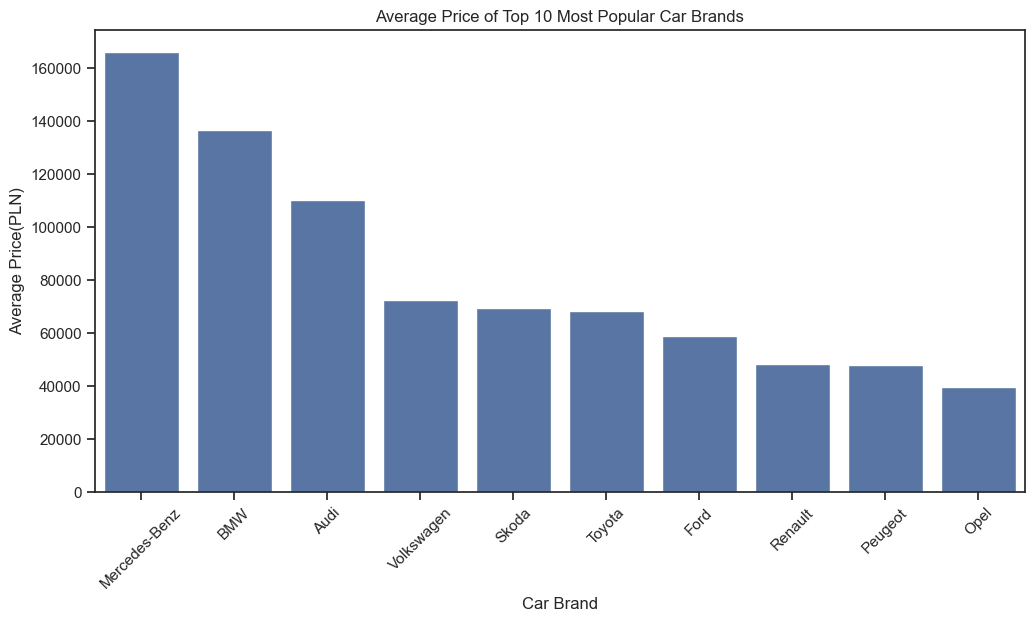

In [42]:
# Average Price of Top 10 Most Popular Car Brands

brands = {}
for brand in df.vehicle_brand:
    if brand not in brands:
        brands[brand] = 0
    brands[brand] += 1
top10popular = sorted(brands.items(), key=lambda x: x[1], reverse=True)[0:10]
top10popular = [x[0] for x in top10popular]
df_top10_popular = df[df['vehicle_brand'].isin(top10popular)]
mean_prices_top10_popular = df_top10_popular.groupby('vehicle_brand')["price"].mean().sort_values(ascending=False)

sns.set_theme(style="ticks")
plt.figure(figsize=(12, 6))
sns.barplot(
    x=mean_prices_top10_popular.index, 
    y=mean_prices_top10_popular.values)
plt.xticks(rotation=45)
plt.title("Average Price of Top 10 Most Popular Car Brands")
plt.xlabel("Car Brand")
plt.ylabel("Average Price(PLN)")


Text(0, 0.5, 'Average Price(PLN)')

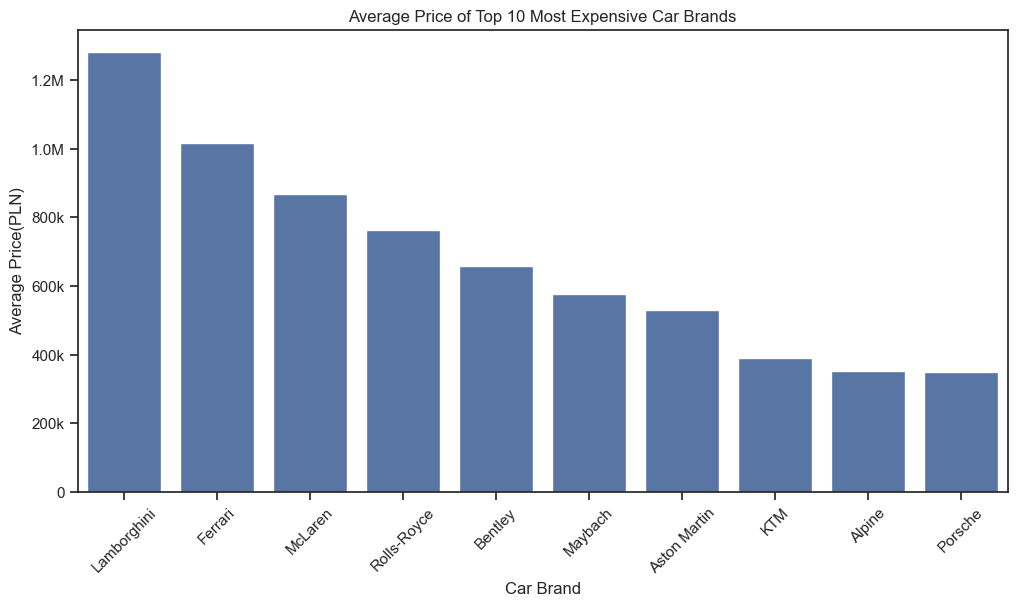

In [68]:
# Average Price of Top 10 Most Expensive Car Brands 

top10_price = df.groupby('vehicle_brand')["price"].mean().sort_values(ascending=False)[0:10]

def ax_formatter(x, pos):
    if x>=1000000:
        return f"{x / 1000000:.1f}M"
    elif x>=100000: 
        return f"{x / 1000:.0f}k"
    else:
        return f"{x:.0f}"

plt.figure(figsize=(12, 6))
plot = sns.barplot(
    x=top10_price.index, 
    y=top10_price.values
)
plot.yaxis.set_major_formatter(plt.FuncFormatter(ax_formatter))
plt.xticks(rotation=45)
plt.title("Average Price of Top 10 Most Expensive Car Brands")
plt.xlabel("Car Brand")
plt.ylabel("Average Price(PLN)")

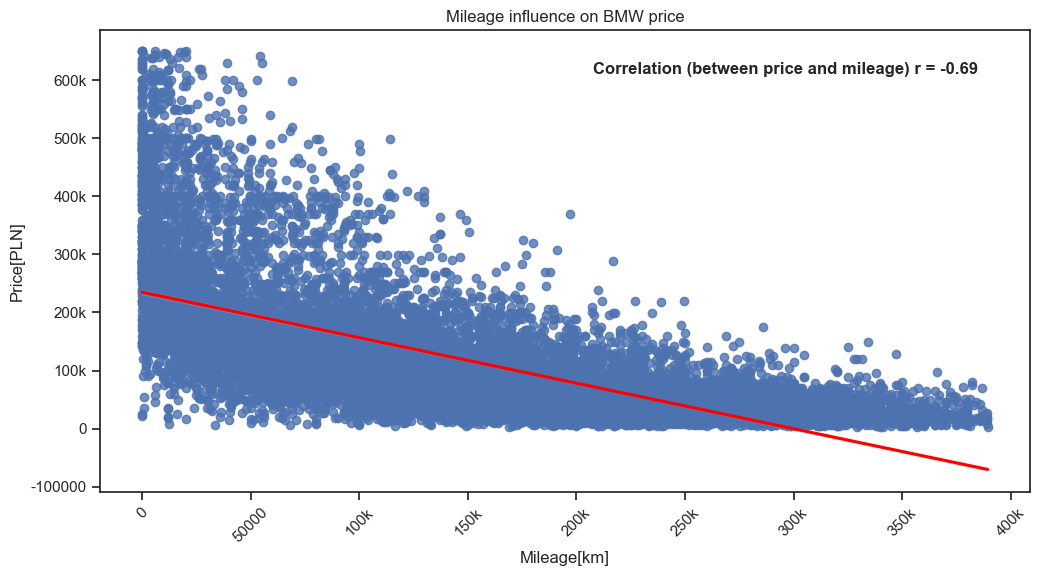

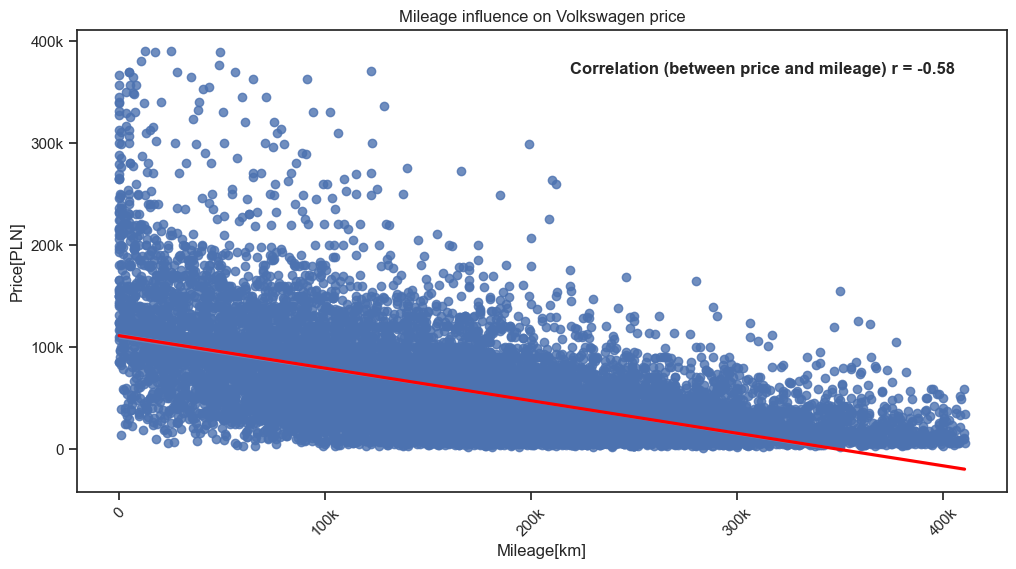

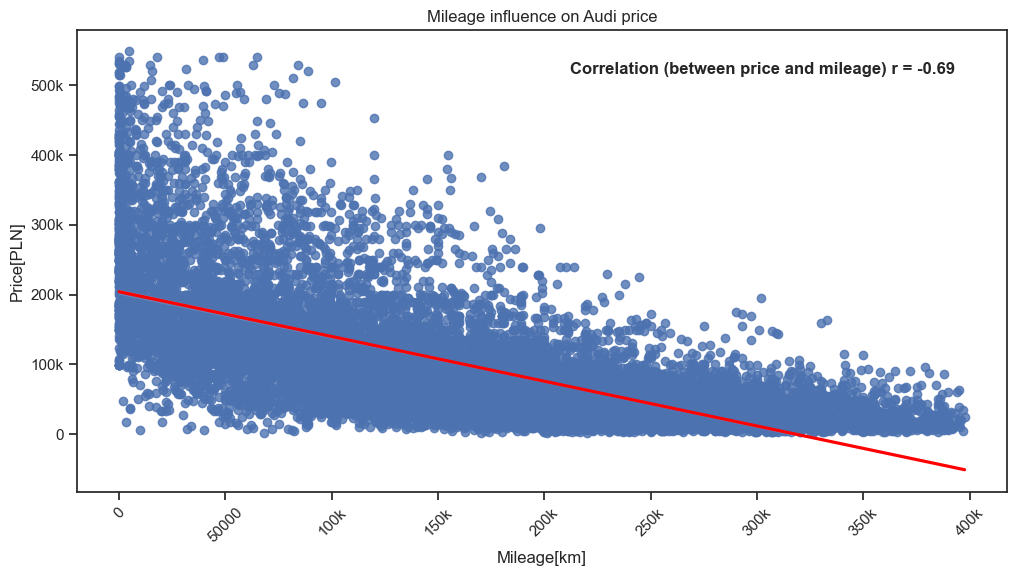

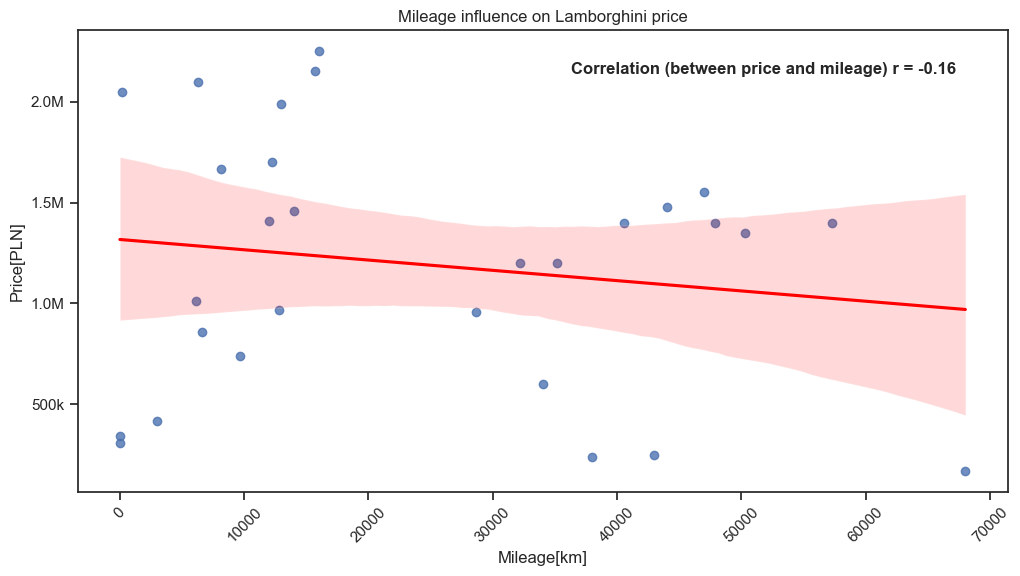

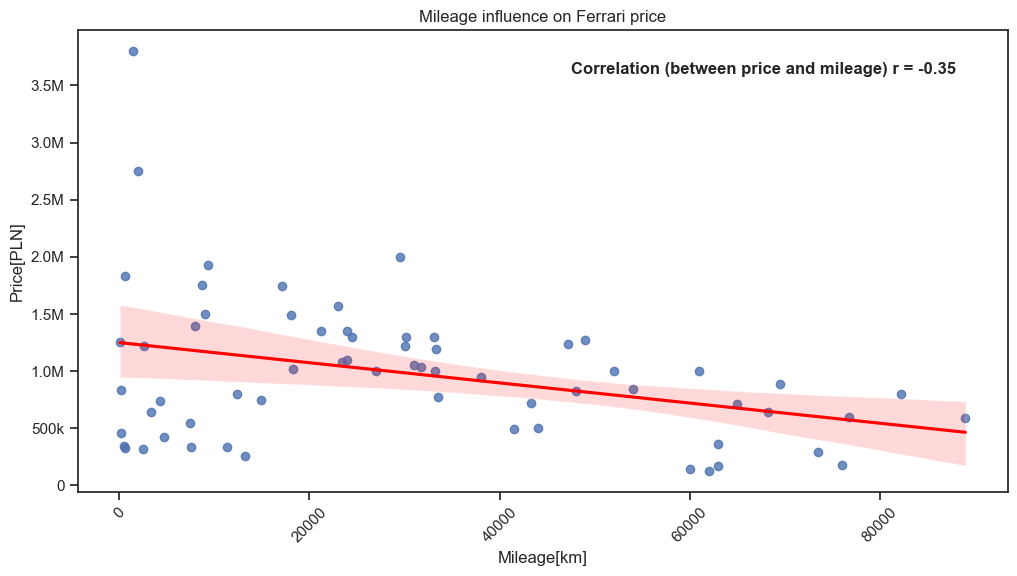

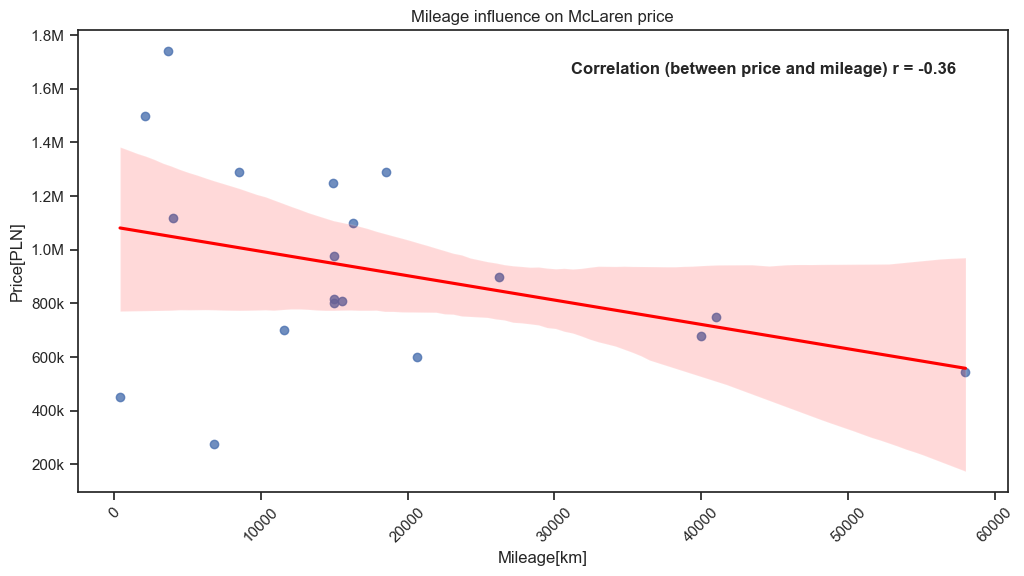

In [82]:
# How mileage influence on price
top3brands_by_popularity = top10popular[0:3]
top3brands_by_price = list(top10_price[0:3].index)
brands_to_plots = top3brands_by_popularity + top3brands_by_price

for brand in brands_to_plots:
    data_for_brand = df[df["vehicle_brand"] == brand]
    # deleting outliers
    upper_bound_mileage = data_for_brand['mileage'].quantile(0.99)
    upper_bound_price = data_for_brand['price'].quantile(0.99)
    data_for_brand_clean = data_for_brand[(data_for_brand['mileage'] < upper_bound_mileage) & (data_for_brand['mileage'] > 10) & (data_for_brand['price'] < upper_bound_price)]
    # correlation
    correlation = data_for_brand_clean["price"].corr(data_for_brand_clean["mileage"])
    # drawing plot
    plt.figure(figsize=(12,6))
    sns.regplot(
        x = data_for_brand_clean["mileage"],
        y = data_for_brand_clean["price"],
        line_kws = {"color":"red"},
    )
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(ax_formatter))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(ax_formatter))
    plt.text(0.53, 0.9, f"Correlation (between price and mileage) r = {correlation:.2f}", transform=ax.transAxes, fontsize=12, fontweight='bold', verticalalignment='bottom')
    plt.title(f"Mileage influence on {brand} price")
    plt.xlabel("Mileage[km]")
    plt.ylabel("Price[PLN]")
    plt.xticks(rotation=45)
    plt.show()

